In [41]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# We read in the data

df = pd.read_csv(r'C:\Users\karth\Desktop\Data Science\Corana portfolio\movies.csv')

# We look at the data

df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [4]:
# We check if any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))
    

name - 0.0%
rating - 1.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 28.0%
gross - 2.0%
company - 0.0%
runtime - 0.0%


In [6]:
# Display data types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


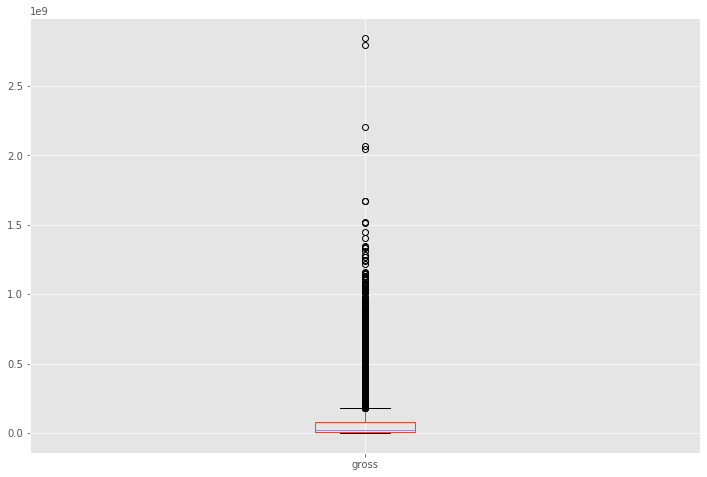

In [7]:
#We examine a boxplot to see the distribution and check for outliers
df.boxplot(column=['gross'])

In [8]:
#Cleaning up data by getting rid of duplicates
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [43]:
#Delete released column,as it is unnecessary for analysis
del df['released']


In [44]:
df

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0


In [45]:
# Order our Data by Score

df.sort_values(by=['score'], inplace=False, ascending=False)

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
2443,The Shawshank Redemption,R,Drama,1994,9.3,2400000.0,Frank Darabont,Stephen King,Tim Robbins,United States,25000000.0,2.881729e+07,Castle Rock Entertainment,142.0
5243,The Dark Knight,PG-13,Action,2008,9.0,2400000.0,Christopher Nolan,Jonathan Nolan,Christian Bale,United States,185000000.0,1.005974e+09,Warner Bros.,152.0
2247,Schindler's List,R,Biography,1993,8.9,1200000.0,Steven Spielberg,Thomas Keneally,Liam Neeson,United States,22000000.0,3.221612e+08,Universal Pictures,195.0
2444,Pulp Fiction,R,Crime,1994,8.9,1900000.0,Quentin Tarantino,Quentin Tarantino,John Travolta,United States,8000000.0,2.139288e+08,Miramax,154.0
4245,The Lord of the Rings: The Return of the King,PG-13,Action,2003,8.9,1700000.0,Peter Jackson,J.R.R. Tolkien,Elijah Wood,New Zealand,94000000.0,1.146031e+09,New Line Cinema,201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5306,Disaster Movie,PG-13,Comedy,2008,1.9,88000.0,Jason Friedberg,Jason Friedberg,Carmen Electra,United States,20000000.0,3.481682e+07,Lionsgate,87.0
4594,Superbabies: Baby Geniuses 2,PG,Comedy,2004,1.9,30000.0,Bob Clark,Robert Grasmere,Jon Voight,Germany,20000000.0,9.448644e+06,ApolloMedia Distribution,88.0
7661,Love by Drowning,R,Drama,2020,NaN,NaN,Justin Kreinbrink,C.E. Poverman,Nicky Whelan,United States,1000000.0,NaN,Dow Jazz Films,121.0
7662,The Robinsons,NaN,Action,2020,NaN,NaN,Directors,Aleks Alifirenko Jr.,Billy Hartmann,United States,10000.0,NaN,NaN,90.0


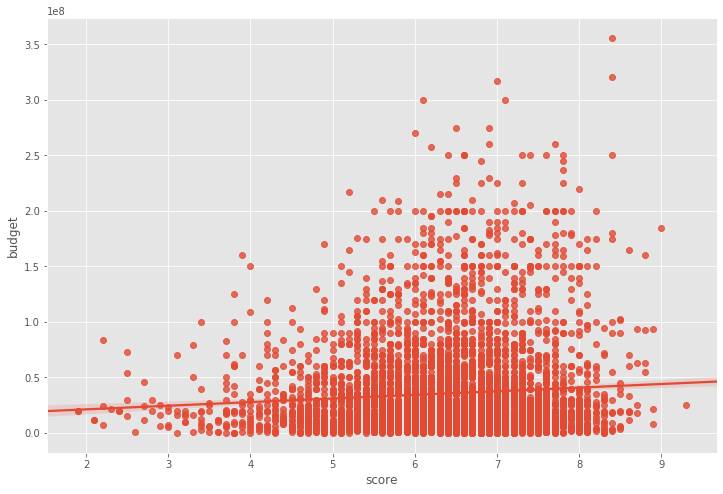

In [46]:
#Seeing correlation between score and budget - We find a weak correlation if any.
sns.regplot(x="score", y="budget", data=df)

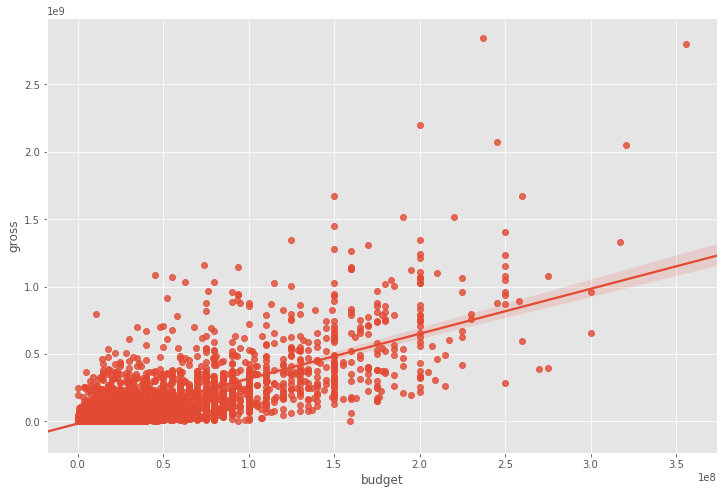

In [57]:
#Seeing correlation between budget and gross - We find some correlation.
sns.regplot(x="budget", y="gross", data=df)

In [58]:
#Examining correlation
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [49]:
# Correlation Matrix for pearson

df.corr(method ='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [50]:
# Correlation Matrix for spearman

df.corr(method ='spearman')

,year,score,votes,budget,gross,runtime
year,1.000000,0.099045,0.469829,0.317336,0.293084,0.142977
score,0.099045,1.000000,0.428138,-0.001403,0.126116,0.399857
votes,0.469829,0.428138,1.000000,0.502466,0.742050,0.290159
budget,0.317336,-0.001403,0.502466,1.000000,0.693670,0.336370
gross,0.293084,0.126116,0.742050,0.693670,1.000000,0.246243
runtime,0.142977,0.399857,0.290159,0.336370,0.246243,1.000000


In [51]:
# Correlation Matrix for kendall

df.corr(method ='kendall')

,year,score,votes,budget,gross,runtime
year,1.000000,0.067652,0.331465,0.224120,0.200618,0.097184
score,0.067652,1.000000,0.300115,-0.000566,0.086046,0.283611
votes,0.331465,0.300115,1.000000,0.353702,0.548899,0.198240
budget,0.224120,-0.000566,0.353702,1.000000,0.512637,0.235483
gross,0.200618,0.086046,0.548899,0.512637,1.000000,0.168933
runtime,0.097184,0.283611,0.198240,0.235483,0.168933,1.000000


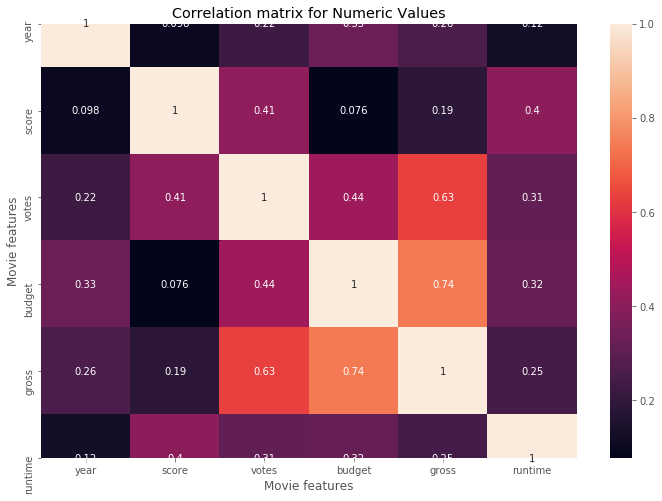

In [67]:
#Pearson correlation. Dark means low correlation, bright is high correlation.
 
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Values")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

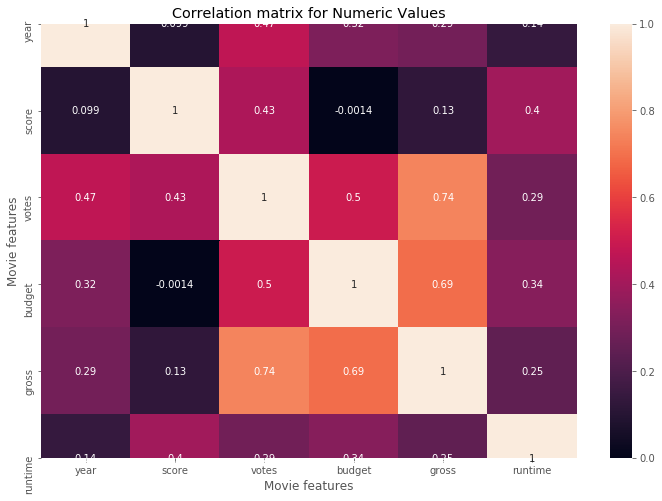

In [66]:
#Spearman correlation. Dark means low correlation, bright is high correlation.
correlation_matrix = df.corr(method ='spearman')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Values")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

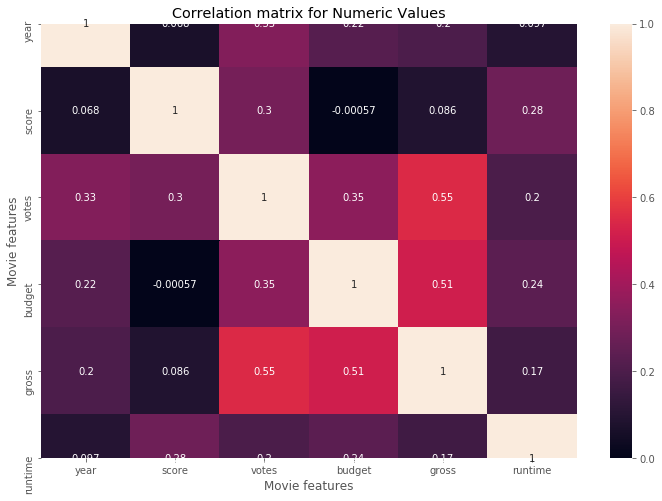

In [65]:
#Kendall correlation. Dark means low correlation, bright is high correlation.
correlation_matrix = df.corr(method ='kendall')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Values")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [62]:
# Using factorize - this assigns a random numeric value for each unique categorical value in pearson

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.143938,0.036367,0.965761,-0.046733,0.287776,0.745905,0.805211,0.731565,0.142828,0.277488,0.947324,0.591667,0.048955
rating,0.143938,1.000000,-0.086723,0.156713,0.012595,0.099972,0.085520,0.103623,0.093116,0.000494,0.193353,0.158582,-0.028035,0.032741
genre,0.036367,-0.086723,1.000000,0.037184,-0.002437,0.023285,0.047288,0.033688,0.038649,-0.015795,0.073008,0.038616,0.009566,0.001462
year,0.965761,0.156713,0.037184,1.000000,-0.044981,0.312401,0.770497,0.824770,0.756400,0.140216,0.300621,0.980873,0.601571,0.050647
score,-0.046733,0.012595,-0.002437,-0.044981,1.000000,-0.009749,-0.022687,-0.034685,-0.009896,0.023097,-0.012642,-0.047041,-0.028432,0.026436
votes,0.287776,0.099972,0.023285,0.312401,-0.009749,1.000000,0.192220,0.224122,0.179601,-0.045914,0.398519,0.286180,0.008900,0.106024
director,0.745905,0.085520,0.047288,0.770497,-0.022687,0.192220,1.000000,0.748340,0.682385,0.155471,0.106617,0.750911,0.552258,-0.011070
writer,0.805211,0.103623,0.033688,0.824770,-0.034685,0.224122,0.748340,1.000000,0.675685,0.157202,0.187238,0.805576,0.546151,0.032264
star,0.731565,0.093116,0.038649,0.756400,-0.009896,0.179601,0.682385,0.675685,1.000000,0.182045,0.107991,0.735680,0.527116,0.035392
country,0.142828,0.000494,-0.015795,0.140216,0.023097,-0.045914,0.155471,0.157202,0.182045,1.000000,-0.082082,0.133982,0.226346,0.124154


In [73]:
# Using factorize - this assigns a random numeric value for each unique categorical value in spearman

df.apply(lambda x: x.factorize()[0]).corr(method='spearman')

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.093768,0.002986,0.965544,-0.051360,0.204964,0.732938,0.801965,0.720696,0.061407,0.243681,0.946263,0.490539,0.030113
rating,0.093768,1.000000,-0.055558,0.102974,0.020893,0.054386,0.062509,0.067472,0.067762,-0.006317,0.155923,0.111393,-0.082805,0.027438
genre,0.002986,-0.055558,1.000000,0.003791,0.001565,-0.026812,0.016174,0.005628,0.017547,-0.036421,0.025891,0.007170,0.007541,-0.012307
year,0.965544,0.102974,0.003791,1.000000,-0.050264,0.227179,0.756871,0.820309,0.743919,0.056936,0.264199,0.980562,0.497349,0.031315
score,-0.051360,0.020893,0.001565,-0.050264,1.000000,-0.013756,-0.021179,-0.037097,-0.016934,0.029012,-0.019776,-0.049996,-0.026747,0.003115
votes,0.204964,0.054386,-0.026812,0.227179,-0.013756,1.000000,0.141046,0.167086,0.124357,-0.022469,0.294955,0.208204,-0.047700,0.056730
director,0.732938,0.062509,0.016174,0.756871,-0.021179,0.141046,1.000000,0.733976,0.666729,0.083153,0.080724,0.737693,0.466950,-0.008455
writer,0.801965,0.067472,0.005628,0.820309,-0.037097,0.167086,0.733976,1.000000,0.662892,0.073491,0.164478,0.801273,0.459749,0.022332
star,0.720696,0.067762,0.017547,0.743919,-0.016934,0.124357,0.666729,0.662892,1.000000,0.088758,0.069275,0.724047,0.442953,0.026634
country,0.061407,-0.006317,-0.036421,0.056936,0.029012,-0.022469,0.083153,0.073491,0.088758,1.000000,-0.123644,0.050172,0.145107,0.040709


In [74]:
# Using factorize - this assigns a random numeric value for each unique categorical value in kendall

df.apply(lambda x: x.factorize()[0]).corr(method='kendall')

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,0.070290,0.001883,0.949292,-0.034502,0.139183,0.577296,0.682326,0.566043,0.047638,0.172136,0.937284,0.391643,0.020374
rating,0.070290,1.000000,-0.044261,0.078171,0.016185,0.041355,0.047396,0.050649,0.050938,-0.005553,0.121533,0.083632,-0.064558,0.021248
genre,0.001883,-0.044261,1.000000,0.002562,0.001120,-0.019429,0.011562,0.003790,0.012782,-0.030525,0.018153,0.004959,0.006299,-0.008714
year,0.949292,0.078171,0.002562,1.000000,-0.034288,0.155229,0.599638,0.698455,0.588389,0.044810,0.189395,0.964536,0.400767,0.021404
score,-0.034502,0.016185,0.001120,-0.034288,1.000000,-0.008909,-0.014362,-0.024903,-0.011400,0.022872,-0.013938,-0.033620,-0.018040,0.002076
votes,0.139183,0.041355,-0.019429,0.155229,-0.008909,1.000000,0.095578,0.113355,0.084137,-0.017500,0.205863,0.140198,-0.032828,0.038563
director,0.577296,0.047396,0.011562,0.599638,-0.014362,0.095578,1.000000,0.581055,0.502752,0.064429,0.055434,0.578474,0.347061,-0.005626
writer,0.682326,0.050649,0.003790,0.698455,-0.024903,0.113355,0.581055,1.000000,0.504846,0.056821,0.114443,0.679034,0.349591,0.015211
star,0.566043,0.050938,0.012782,0.588389,-0.011400,0.084137,0.502752,0.504846,1.000000,0.068356,0.048212,0.566432,0.327534,0.018111
country,0.047638,-0.005553,-0.030525,0.044810,0.022872,-0.017500,0.064429,0.056821,0.068356,1.000000,-0.099165,0.038746,0.113388,0.031582


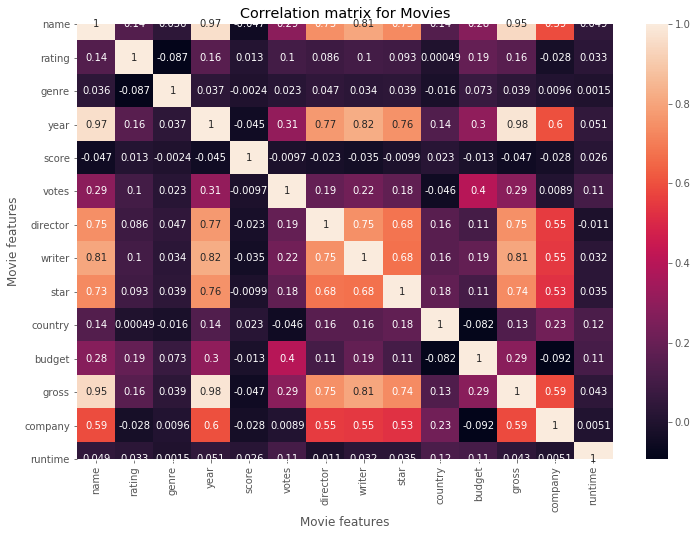

In [70]:
#Lambda Correlation matrix for Movies(Pearson)
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

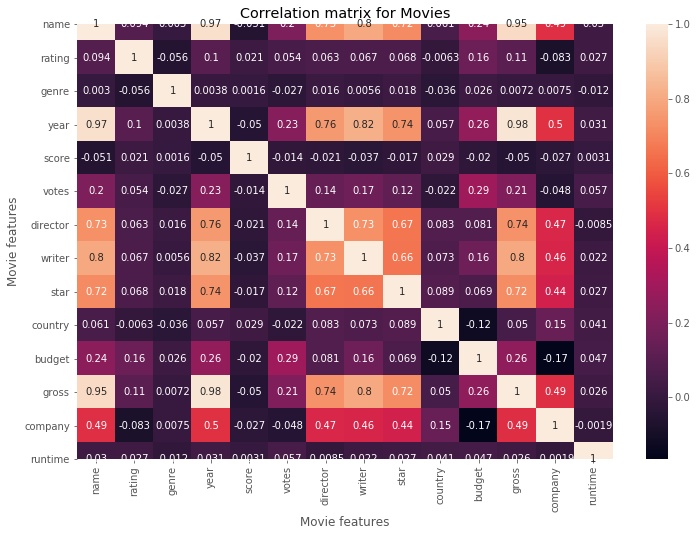

In [71]:
#Lambda Correlation matrix for Movies(Spearman)
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='spearman')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

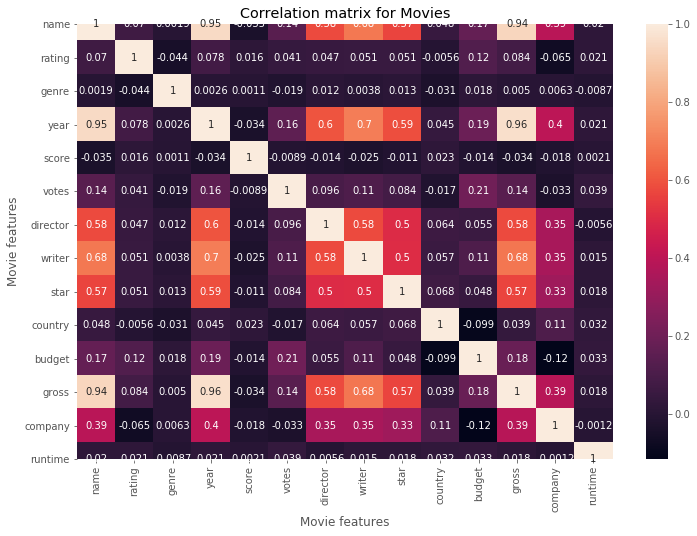

In [72]:
#Lambda Correlation matrix for Movies(Kendall)
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='kendall')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [75]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()
corr_pairs = correlation_mat.unstack()
print(corr_pairs)

name     name       1.000000
         rating     0.143938
         genre      0.036367
         year       0.965761
         score     -0.046733
                      ...   
runtime  country    0.124154
         budget     0.112097
         gross      0.042978
         company    0.005137
         runtime    1.000000
Length: 196, dtype: float64


In [76]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

company  budget    -0.092249
budget   company   -0.092249
rating   genre     -0.086723
genre    rating    -0.086723
country  budget    -0.082082
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 196, dtype: float64


In [77]:
# We can now relationships that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

star      company     0.527116
company   star        0.527116
          writer      0.546151
writer    company     0.546151
company   director    0.552258
director  company     0.552258
gross     company     0.588156
company   gross       0.588156
          name        0.591667
name      company     0.591667
company   year        0.601571
year      company     0.601571
writer    star        0.675685
star      writer      0.675685
director  star        0.682385
star      director    0.682385
name      star        0.731565
star      name        0.731565
          gross       0.735680
gross     star        0.735680
director  name        0.745905
name      director    0.745905
director  writer      0.748340
writer    director    0.748340
director  gross       0.750911
gross     director    0.750911
year      star        0.756400
star      year        0.756400
director  year        0.770497
year      director    0.770497
name      writer      0.805211
writer    name        0.805211
        

In [79]:
# Looking at the top 20 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:20]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                     56491421806
Universal Pictures               52514188890
Columbia Pictures                43008941346
Paramount Pictures               40493607415
Twentieth Century Fox            40257053857
Walt Disney Pictures             36327887792
New Line Cinema                  19883797684
Marvel Studios                   15065592411
DreamWorks Animation             11873612858
Touchstone Pictures              11795832638
Dreamworks Pictures              11635441081
Metro-Goldwyn-Mayer (MGM)         9230230105
Summit Entertainment              8373718838
Pixar Animation Studios           7886344526
Fox 2000 Pictures                 7443502667
Lucasfilm                         7185352192
Walt Disney Animation Studios     6751509051
Lionsgate                         6078452519
TriStar Pictures                  5667436463
Screen Gems                       4113025024
Name: gross, dtype: int64